In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('metrics.csv', parse_dates=['time'])
df.sample(10)

,time,name,value
28,2021-07-13 14:37:05.778,mem,2.275143e+08
16,2021-07-13 14:37:00.036,cpu,3.095000e+01
41,2021-07-13 14:37:11.520,cpu,2.804000e+01
75,2021-07-13 14:37:27.789,mem,2.274959e+08
51,2021-07-13 14:37:16.305,mem,2.275561e+08
65,2021-07-13 14:37:23.004,cpu,3.298000e+01
95,2021-07-13 14:37:37.359,mem,2.274985e+08
38,2021-07-13 14:37:10.563,cpu,2.737000e+01
12,2021-07-13 14:36:58.122,mem,2.275156e+08
55,2021-07-13 14:37:18.219,mem,2.275523e+08


In [4]:
df.groupby('name').describe()


time                                                             \
     count                           mean                         min   
name                                                                    
CPU      1  2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000   
cpu     49  2021-07-13 14:37:16.168285696  2021-07-13 14:36:52.380000   
mem     50  2021-07-13 14:37:15.826500096  2021-07-13 14:36:52.380000   

                                                                    \
                                25%                            50%   
name                                                                 
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000064   
cpu   2021-07-13 14:37:04.820999936  2021-07-13 14:37:16.304999936   
mem   2021-07-13 14:37:04.103249920  2021-07-13 14:37:15.826499840   

                                                                     value  \
                                75%                         max  std count   
name                                                                         
CPU   2021-07-13 14:36:59.079000064  2021-07-13 14:36:59.079000  NaN   1.0   
cpu   2021-07-13 14:37:27.788999936  2021-07-13 14:37:39.273000  NaN  49.0   
mem   2021-07-13 14:37:27.549750016  2021-07-13 14:37:39.273000  NaN  50.0   

                                                                      \
              mean     min           25%           50%           75%   
name                                                                   
CPU   3.040000e+01   30.40  3.040000e+01  3.040000e+01  3.040000e+01   
cpu   3.645633e+01  -32.14  2.956000e+01  3.157000e+01  3.507000e+01   
mem   2.229711e+08  295.00  2.275070e+08  2.275188e+08  2.275342e+08   

                                 
              max           std  
name                             
CPU          30.4           NaN  
cpu         300.9  3.977927e+01  
mem   227556054.0  3.217637e+07

In [5]:
df['name'].value_counts()

name
mem    50
cpu    49
CPU     1
Name: count, dtype: int64

array([<Axes: xlabel='time'>, <Axes: xlabel='time'>,
       <Axes: xlabel='time'>], dtype=object)

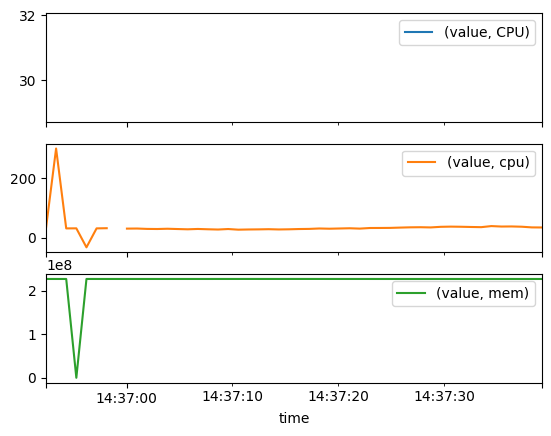

In [6]:
pd.pivot(df, index='time', columns='name').plot(subplots=True)

In [7]:
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [8]:
mem = df[df['name'] == 'mem']['value']
z_score = (mem - mem.mean())/mem.std()
bad_mem = mem[z_score.abs() > 2]
# bad_mem
df.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0
